In [1]:
%matplotlib inline

In [101]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [3]:
def iter_loadtxt(filename, delimiter=',', skiprows=0, dtype=float):
    def iter_func():
        with open(filename, 'r') as infile:
            for _ in range(skiprows):
                next(infile)
            for line in infile:
                line = line.rstrip().split(delimiter)
                for item in line:
                    yield dtype(item)
        iter_loadtxt.rowlength = len(line)

    data = np.fromiter(iter_func(), dtype=dtype)
    data = data.reshape((-1, iter_loadtxt.rowlength))
    return data

In [4]:
# Load data
Xdjf = np.loadtxt('data/djf.csv', delimiter=',', skiprows=1)

In [5]:
x1850 = Xdjf[Xdjf[:,0] == 1850.0, :]
x1850 = x1850[:,1:]
x1850.shape

(345600, 3)

In [94]:
nclusters = 10
km = KMeans(n_clusters=nclusters, n_jobs=-1)
y_km = km.fit_predict(x1850)

In [95]:
y_km.shape

(345600,)

In [96]:
clust1850 = [[x1850[y_km==c,0], x1850[y_km==c,1], x1850[y_km==c,2]] for c in range(nclusters)]

In [97]:
def shift_lon(y):
    lon1 = y.copy()
    for n, l in enumerate(lon1):
        if l >= 180:
           lon1[n]=lon1[n]-360
    lon = lon1
    return lon[::-1]

lons = []
for c in range(nclusters):
    l = shift_lon(clust1850[c][1])
    lons.append(l)

/home/hflores/anaconda3/envs/arcticsea/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/hflores/anaconda3/envs/arcticsea/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


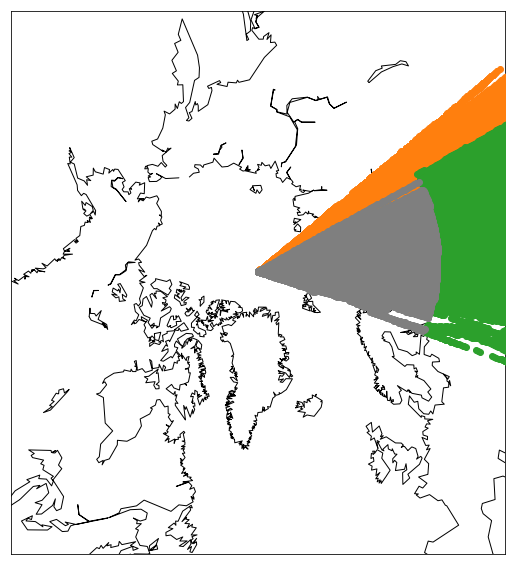

In [98]:
fig = plt.figure(figsize=(10, 10))
    
m = Basemap(width=10.e6, height=11e6,
            projection='gnom', lat_0=88.0, lon_0=-40.0)

m.drawcoastlines(color='black')
#m.fillcontinents(color='gray')

for c in range(nclusters):
    m.scatter(clust1850[c][0::-1], lons[c], latlon=True, marker='o', zorder=10)
plt.show()

In [99]:
from mpl_toolkits.mplot3d import Axes3D

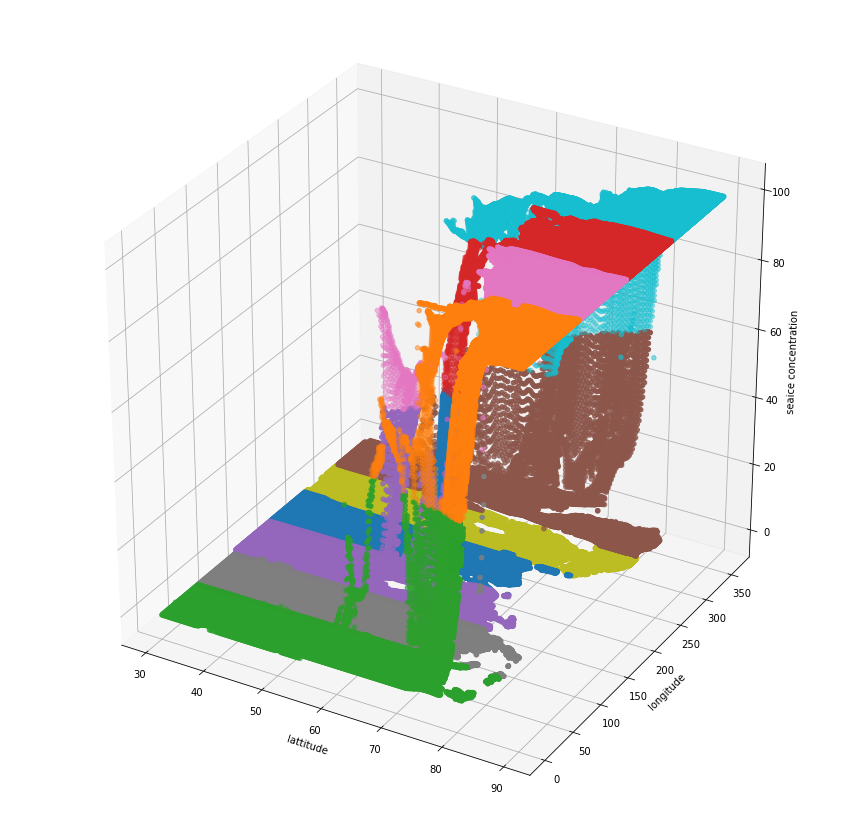

In [100]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

for c in range(nclusters):
    xs = np.array(clust1850[c][0])
    ys = np.array(clust1850[c][1])
    zs = np.array(clust1850[c][2])
    ax.scatter(xs, ys, zs)

ax.set_xlabel('lattitude')
ax.set_ylabel('longitude')
ax.set_zlabel('seaice concentration')